In [9]:
# practice calculating entropy
import numpy as np
# Entropy (discrete)
def H(probs):
    entropy = 0
    for p in probs:
        entropy -= np.log2(p) * p #remember that log(1/p) = -log(p)
    return entropy

# Example probabilities
probabilities = [.3, .2, .5]

# Calculate
print('Entropy of p(x): ', H(probabilities))

Entropy of p(x):  1.4854752972273344


In [10]:
# Conditional Entropy (discrete)
def Hygx(prob_table):
    conditional_entropy = 0
    for row in range(prob_table.shape[0]):
        p_row = sum(prob_table[row,:])
        for p in prob_table[row,:]:
            p_cond = p / p_row
            if p_cond == 0.0:
                conditional_entropy -= 0
            else:
                conditional_entropy -= p_row * p_cond * np.log2(p_cond)

    return conditional_entropy

In [11]:
ptable = np.array([[.0, .1, .5],
                   [.3, .1, .0]])

Hygx(ptable)

np.float64(0.7145247027726658)

In [12]:
ptable = np.array([[.1, .1, .3],
                   [.2, .1, .2]])

Hygx(ptable)

np.float64(1.4464393446710155)

In [13]:
ptable = np.array([[.15, .1, .25],
                   [.15, .1, .25]])

Hygx(ptable)

np.float64(1.4854752972273344)

In [14]:
ptable = np.array([[.0, .1, .5],
                   [.3, .1, .0]])

H(probabilities) - Hygx(ptable)

np.float64(0.7709505944546686)

In [15]:
ptable = np.array([[.1, .1, .3],
                   [.2, .1, .2]])

H(probabilities) - Hygx(ptable)

np.float64(0.039035952556318865)

In [16]:
import pandas as pd
gtky = pd.read_csv('ds4400_clean_gtky.csv')
gtky.head()

,class,cs_ds,co_op,credit_hours,work_hours
0,Senior,DS,Yes,17,12
1,Sophomore,CS,No,17,0
2,Senior,DS,No,17,15
3,Senior,CS,Yes,16,3
4,Junior,CS,No,16,0


In [17]:
from collections import Counter
Counter(gtky.co_op)

Counter({'Yes': 15, 'No': 12})

In [18]:
p_coop = np.array(list(Counter(gtky.co_op).values()))/gtky.shape[0]
p_coop

array([0.55555556, 0.44444444])

In [19]:
H(p_coop)

np.float64(0.9910760598382222)

In [20]:
onehot_gtky = pd.get_dummies(gtky, drop_first=True, dtype = int)
onehot_gtky.head()

,credit_hours,work_hours,class_Senior,class_Sophomore,cs_ds_CY,cs_ds_DS,co_op_Yes
0,17,12,1,0,0,1,1
1,17,0,0,1,0,0,0
2,17,15,1,0,0,1,0
3,16,3,1,0,0,0,1
4,16,0,0,0,0,0,0


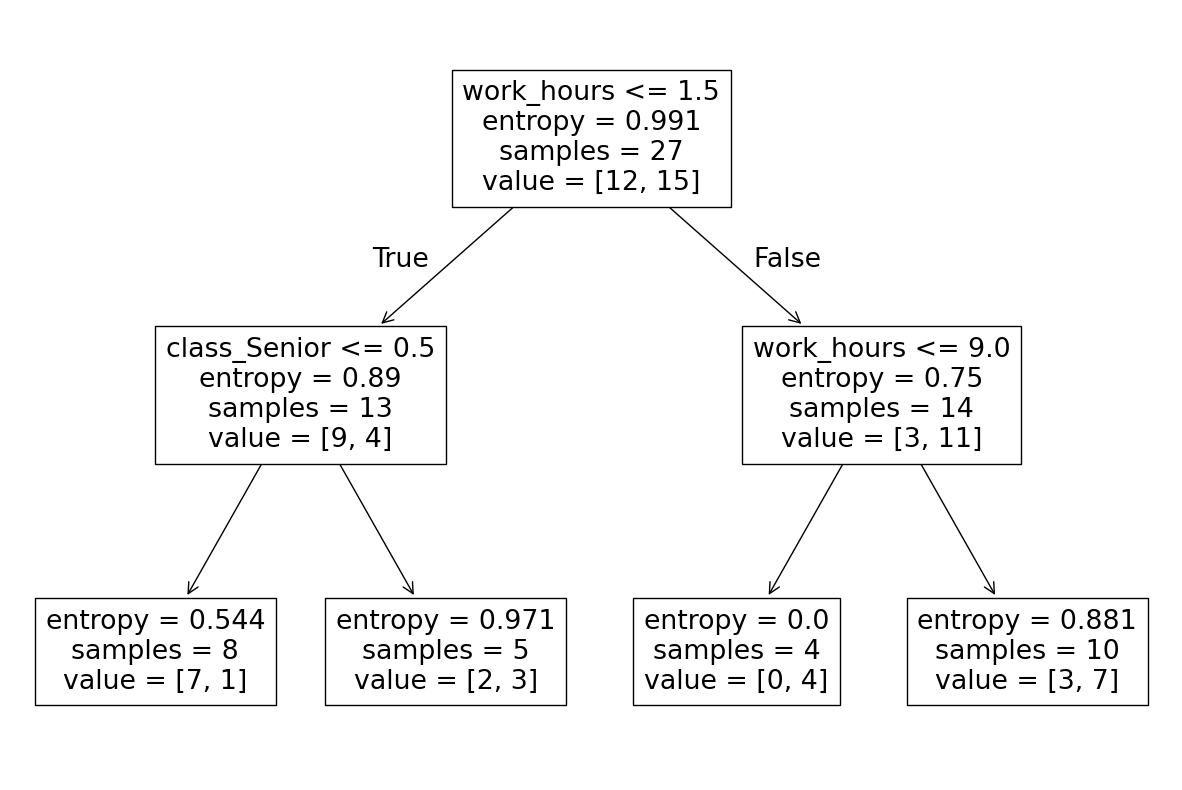

In [21]:
from sklearn import tree
import matplotlib.pyplot as plt

y = onehot_gtky.co_op_Yes
X = onehot_gtky.iloc[:,:-1]

# Create a decision tree classifier with a max of 2 sets of branches
clf = tree.DecisionTreeClassifier(max_depth=2, criterion='entropy')
clf = clf.fit(X, y)

plt.figure()
plt.gcf().set_size_inches(15, 10)
tree.plot_tree(clf, feature_names=list(X.columns));

In [22]:
# verify the entropies of the first split
p_yx1_less = [9/13, 4/13]
H(p_yx1_less)

np.float64(0.8904916402194913)

In [23]:
p_yx1_greater = [3/14, 11/14]
H(p_yx1_greater)

np.float64(0.74959525725948)

In [24]:
pd.crosstab(gtky['class'], gtky.co_op)

co_op,No,Yes
class,,
Junior,7,5
Senior,3,10
Sophomore,2,0


In [25]:
p_sophomore = np.array([[2/27, 0/27],
                        [10/27, 15/27]])
Hygx(p_sophomore)

np.float64(0.8990283281987672)

In [26]:
p_junior = np.array([[7/27, 5/27],
                     [5/27, 10/27]])
Hygx(p_junior)

np.float64(0.9456615774307843)

In [27]:
p_senior = np.array([[3/27, 10/27],
                     [9/27, 5/27]])
Hygx(p_senior)

np.float64(0.8627981965254051)

In [28]:
p_wh15table = np.array([[9/27, 4/27],
                        [3/27, 11/27]])
Hygx(p_wh15table)

np.float64(0.8174342564624484)

In [29]:
pd_nextbranch = np.array([[2/27, 3/27],
                          [10/27, 12/27]])
Hygx(pd_nextbranch)

np.float64(0.9897562083246809)

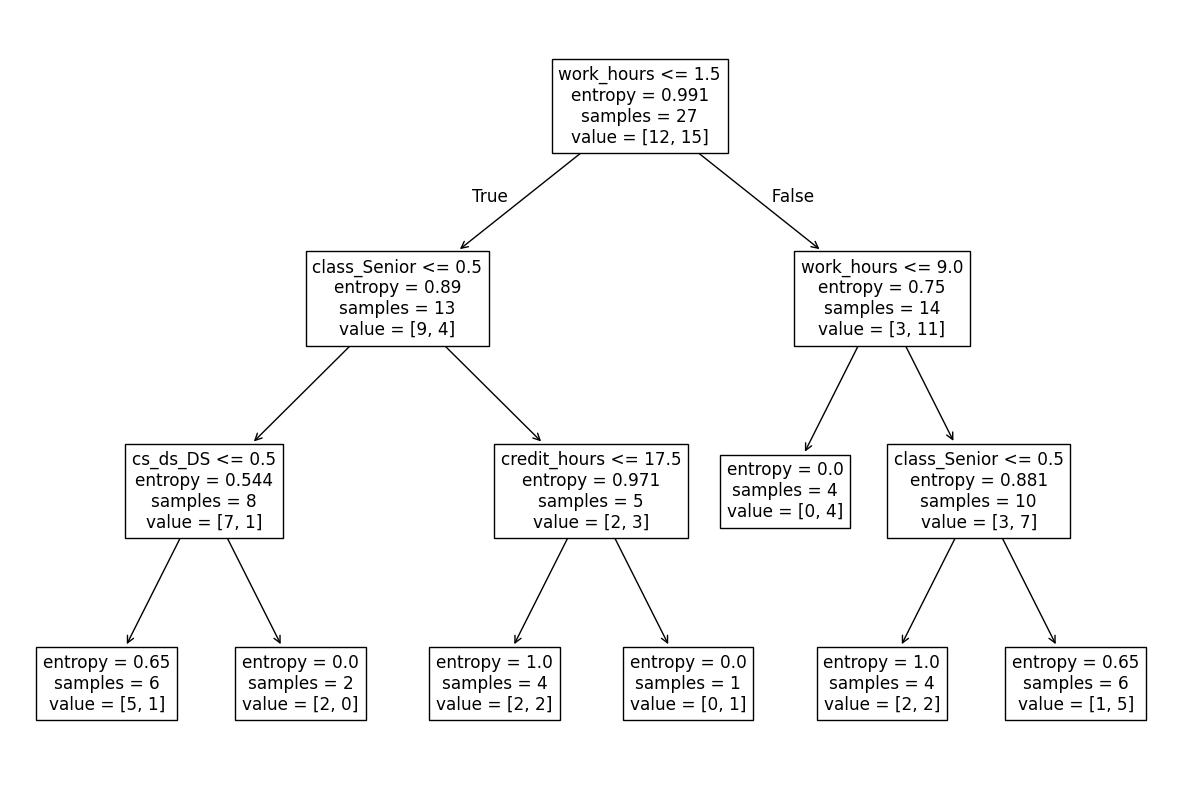

In [30]:
# Create a decision tree classifier with a max of 3 sets of branches
clf = tree.DecisionTreeClassifier(max_depth=3, criterion='entropy')
clf = clf.fit(X, y)

plt.figure()
plt.gcf().set_size_inches(15, 10)
tree.plot_tree(clf, feature_names=list(X.columns));

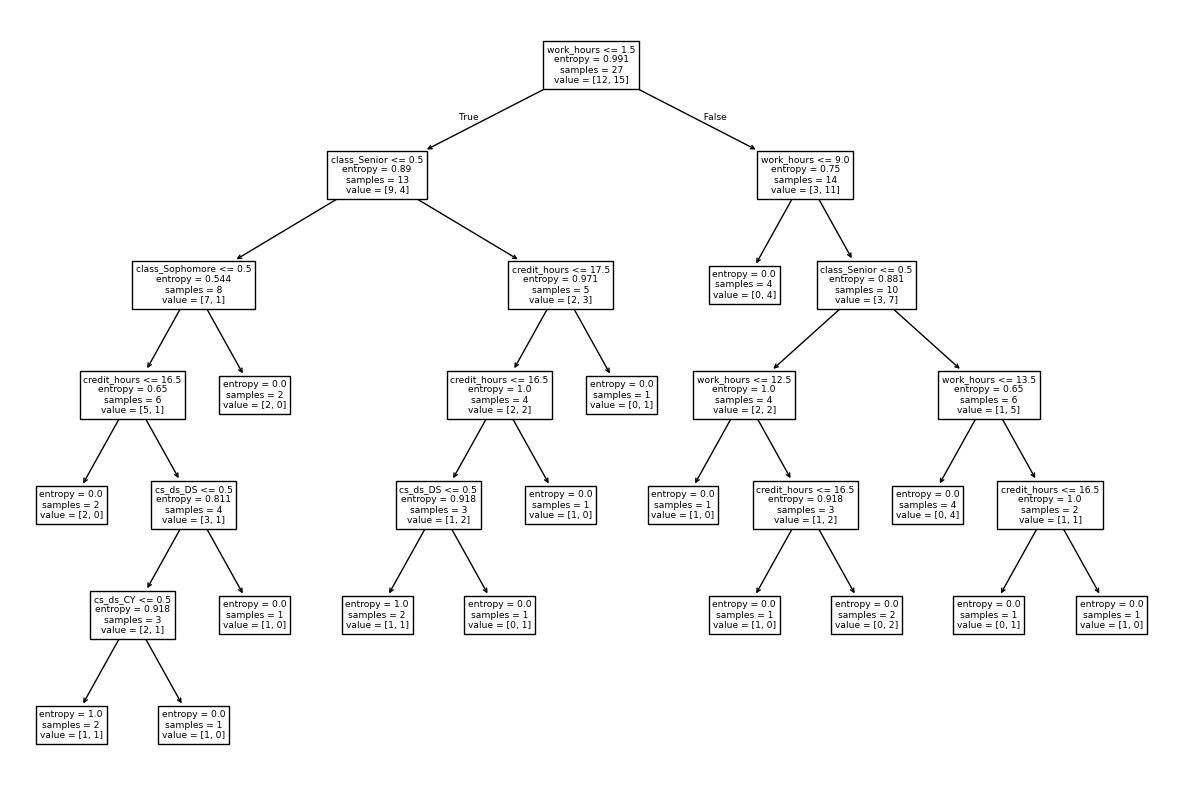

In [31]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X, y)

plt.figure()
plt.gcf().set_size_inches(15, 10)
tree.plot_tree(clf, feature_names=list(X.columns));

<Axes: >

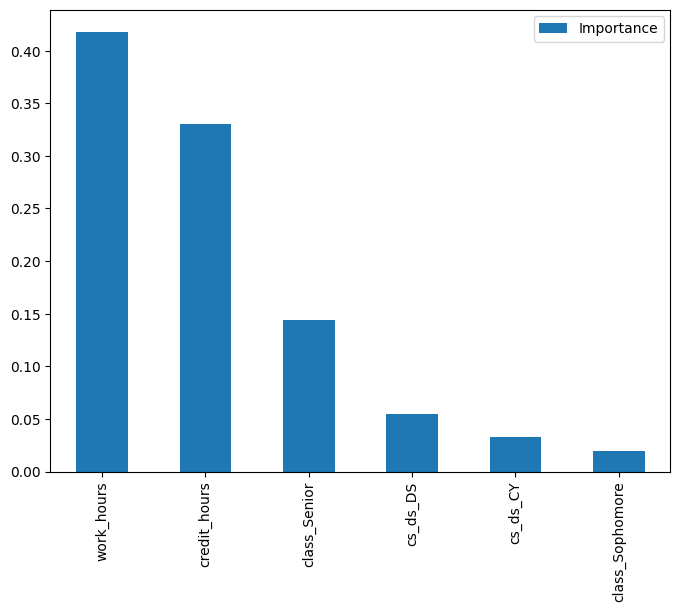

In [32]:
# plotting the feature importances
# this is the TOTAL INFORMATION GAIN from each of the features based on splitting in the tree
feat_importances = pd.DataFrame(clf.feature_importances_, index=X.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))

In [33]:
from sklearn.metrics import accuracy_score

clf = tree.DecisionTreeClassifier(max_depth=3, criterion='entropy')
clf = clf.fit(X, y)

# the predictions from the single tree
single_preds = clf.predict(X)
accuracy_score(single_preds, y)

0.7777777777777778

In [34]:
# fitting a random forest of trees
from sklearn.ensemble import RandomForestClassifier

clf2 = RandomForestClassifier(max_depth=3, random_state=42, criterion='entropy')
clf2.fit(X,y)

RandomForestClassifier(criterion='entropy', max_depth=3, random_state=42)

In [35]:
# the predictions from the random forest
forest_preds = clf2.predict(X)
accuracy_score(forest_preds, y)

0.8148148148148148

In [36]:
# Note; you should REALLY be cross validating (for both decision trees and random forests)
# and I'll PROBABLY ask you to do this on the last homework,
# but you DO NOT have to normalize the numeric features, since the scale of the features
# does NOT affect the Information Gain

In [37]:
import numpy as np
Q = np.array([[2, -1],
              [-1, 7/6]])
np.linalg.eig(Q)

EigResult(eigenvalues=array([2.66666667, 0.5       ]), eigenvectors=array([[ 0.83205029,  0.5547002 ],
       [-0.5547002 ,  0.83205029]]))